In [1]:
"""
Topic:        Project 2
Subject:      Carbon Emissions
Date:         xx/xx/xxxx
Name:         Leo Knauth
Worked with:  --


""";

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings('ignore')

import itertools

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from pandas.plotting import autocorrelation_plot

import re

import sys
import os

In [110]:
df_gdp = pd.read_pickle("gdp_per_capita.pkl")

In [111]:
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [112]:
df_co2 = pd.read_pickle('co2_per_capita.pkl')

In [113]:
df_co2.head()

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [114]:
df_gdp.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [115]:
select_years = list(map( lambda x : str(x), range(1962, 2013)))
select_years;

In [116]:
df_gdp_years = df_gdp[['country'] + select_years]

In [117]:
df_gdp_years.head()

,country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1188.0,1185.0,1182.0,1182.0,1168.0,1173.0,1187.0,1178.0,1174.0,...,1097.0,1067.0,1146.0,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2832.0,2926.0,3023.0,3129.0,3242.0,3359.0,3475.0,3587.0,3712.0,...,6274.0,6672.0,7075.0,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0
4,Algeria,4481.0,5551.0,5693.0,5916.0,5478.0,5811.0,6319.0,6747.0,7227.0,...,11251.0,11575.0,12077.0,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0


In [118]:
df_gdp_clean = df_gdp_years.dropna().reset_index()

In [119]:
df_gdp_clean.drop('index', 1, inplace = True)

In [120]:
df_gdp_clean;

In [121]:
df_co2_years = df_co2[['country'] + select_years]

In [122]:
df_co2_years.head(200);

In [123]:
df_co2_clean = df_co2_years.dropna().reset_index()

In [124]:
df_co2_clean.drop('index', 1, inplace = True)

In [125]:
# df_co2_clean.loc['mean'] = df_co2_clean.mean()

In [126]:
df_co2_clean;

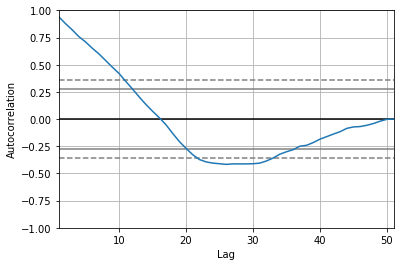

In [127]:
# autocorrelation for a sample country

autocorrelation_plot(df_co2_clean.iloc[17][1:])

In [128]:
array = np.array(df_co2_clean.iloc[17][1:])
series = df_co2_clean.iloc[17][1:]

In [129]:
model = ARIMA(array, order=(5,1,0))

In [130]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -25.676
Method:                       css-mle   S.D. of innovations              0.404
Date:                Sun, 14 Apr 2019   AIC                             65.352
Time:                        18:21:05   BIC                             78.736
Sample:                             1   HQIC                            70.449
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0610      0.059     -1.038      0.305      -0.176       0.054
ar.L1.D.y     -0.0434      0.145     -0.299      0.766      -0.327       0.241
ar.L2.D.y     -0.0336      0.145     -0.232      0.8

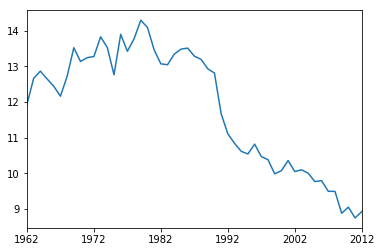

In [24]:
series.plot()

In [25]:
def fuller_test(series):
    values = series.values
    result = adfuller(values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [26]:
# difference for detrending
diff = list()
for i in range(1, len(values)):
    value = values[i] - values[i - 1]
    diff.append(value)
plt.plot(diff)

NameError: name 'values' is not defined

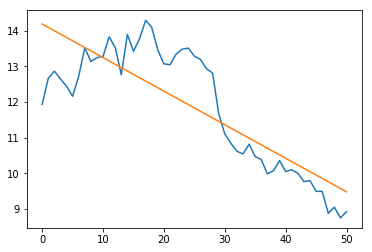

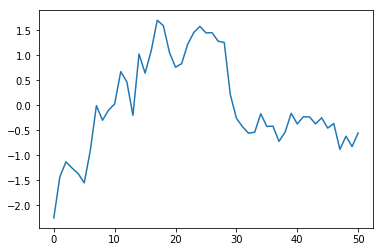

In [27]:
# detrending with linear regression

'''
note to self: detrending is necessary, but apparently ARIMA does it for you.
Or not.
'''

X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

# print(y)

model = LinearRegression()
model.fit(X, y)
# calculate trend

trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

In [28]:
'''
In order to use Arima I must first transpose my dataframe and set a dateIndex.

Do not know how to rename the index. 
''';

In [29]:
df_co2_transpose = df_co2_clean.transpose()
df_co2_transpose.columns = df_co2_transpose.iloc[0]
df_co2_transpose.drop('country',0, inplace = True)
# df_co2_transpose = df_co2_transpose.rename(index = str, columns={"country": "year"}) 
df_co2_transpose = df_co2_transpose.apply(pd.to_numeric)


# df_co2_transpose.index.names = ['year']
# df_co2_transpose = df_co2_transpose.reindex(df_co2_transpose.index.rename(['year']))
df_co2_transpose;
# df_co2_transpose.info()

In [30]:
def find_best_params():
    '''
    attempting to find the best
    '''
    
    
    # creating the  parameters as tuples
    p = d = q = range(0, 6)
    pdq = list(itertools.product(p, d, q))
    
    #
    for param in pdq:
        for param in pdq:
            model = sm.tsa.arima_model.ARIMA(param, )
    

In [108]:
# find_best_params()

In [32]:
'''
filter df_gdp_clean by countries that we also have CO2 data for
'''
df_gdp_com = df_gdp_clean[df_gdp_clean['country'].isin(df_co2_clean['country'])].reset_index().drop('index', 1)

In [33]:
# df_co2_clean[df_co2_clean['country'].isin(df_gdp_clean['country'])]

In [34]:
# df_gdp_com
df_gdp_transpose = df_gdp_com.transpose()
df_gdp_transpose.columns = df_gdp_transpose.iloc[0]
df_gdp_transpose.drop('country',0, inplace = True)
# df_gdp_com = df_gdp_transpose.rename(index = str, columns={"country": "year"}) 
df_gdp_transpose = df_gdp_transpose.apply(pd.to_numeric)


# df_gdp_transpose.index.names = ['year']
# df_gdp_transpose = df_gdp_transpose.reindex(df_gdp_com.index.rename(['year']))
df_gdp_transpose.tail()
# df_gdp_com.info()

country,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,Chile,...,Switzerland,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
2008,12314.0,14646.0,41312.0,43952.0,2265.0,41641.0,13906.0,15368.0,41468.0,18698.0,...,55020.0,36526.0,12216.0,30875.0,16454.0,73029.0,37739.0,50384.0,17911.0,4085.0
2009,12285.0,14605.0,41170.0,42171.0,2355.0,40225.0,13749.0,14692.0,39884.0,18329.0,...,53179.0,36491.0,11915.0,29383.0,15467.0,60955.0,35840.0,48558.0,17056.0,4260.0
2010,12494.0,15765.0,41330.0,42861.0,2459.0,40764.0,14660.0,14886.0,40773.0,19204.0,...,54183.0,39085.0,12822.0,29321.0,16674.0,56644.0,36240.0,49373.0,16536.0,4486.0
2011,12606.0,16972.0,41706.0,44029.0,2589.0,40946.0,15101.0,15278.0,41567.0,20141.0,...,54551.0,39059.0,12798.0,28743.0,17908.0,56192.0,36549.0,49781.0,16960.0,4717.0
2012,12779.0,17101.0,42522.0,44216.0,2725.0,40687.0,15234.0,15443.0,41865.0,21050.0,...,54573.0,39482.0,13586.0,29086.0,18057.0,57028.0,36535.0,50549.0,17642.0,4912.0


In [35]:
'''
find the betas of gdp/c and co2/c per year for all countries
''';

In [36]:
# betas = {}
df_ratios = df_gdp_transpose.copy()

for year in select_years:
    
    for country in df_gdp_transpose.columns:
#         print(year)
#         print(country)
        year1 = str(year).strip()
        df_ratios.loc[year1][country] = df_co2_transpose.loc[year1][country] / df_gdp_transpose.loc[year1][country]
        
        


In [37]:
df_ratios;

In [38]:
'''
creating test data train data split
'''
df_ratios_train = df_ratios.loc['1962':'2002']
df_co2_train = df_co2_transpose.loc['1962':'2002']
df_gdp_train = df_gdp_transpose.loc['1962':'2002']

In [39]:
df_ratios_train.tail()

country,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,Chile,...,Switzerland,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
1998,0.000374,0.000311,0.000560,0.000227,0.000125,0.000336,0.000164,0.000671,0.000499,0.000266,...,0.000125,0.000285,0.000332,0.000938,0.000250,0.000284,0.000305,0.000458,0.000463,0.000253
1999,0.000312,0.000340,0.000500,0.000214,0.000126,0.000315,0.000167,0.000640,0.000474,0.000282,...,0.000120,0.000284,0.000339,0.001059,0.000253,0.000265,0.000290,0.000443,0.000508,0.000243
2000,0.000291,0.000332,0.000488,0.000206,0.000132,0.000304,0.000164,0.000599,0.000467,0.000260,...,0.000111,0.000287,0.000334,0.001071,0.000261,0.000343,0.000284,0.000440,0.000433,0.000257
2001,0.000267,0.000327,0.000473,0.000210,0.000146,0.000299,0.000167,0.000609,0.000452,0.000227,...,0.000120,0.000309,0.000350,0.001049,0.000249,0.000304,0.000280,0.000427,0.000474,0.000276
2002,0.000272,0.000342,0.000478,0.000211,0.000146,0.000276,0.000159,0.000553,0.000434,0.000233,...,0.000114,0.000309,0.000355,0.001045,0.000248,0.000247,0.000264,0.000422,0.000582,0.000301


## Plotting the co2 emissions per capita / gdp per capita ratios for all coutries

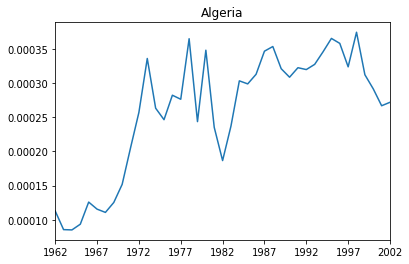

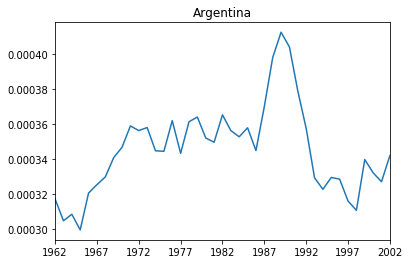

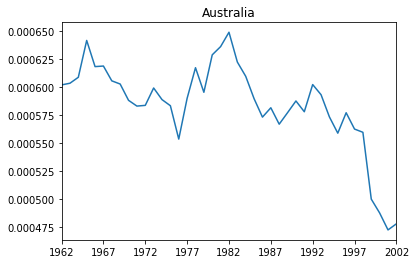

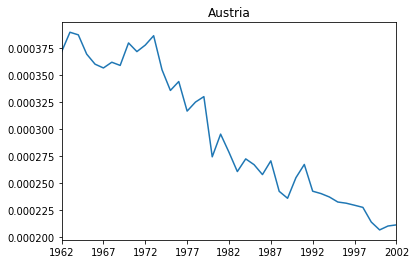

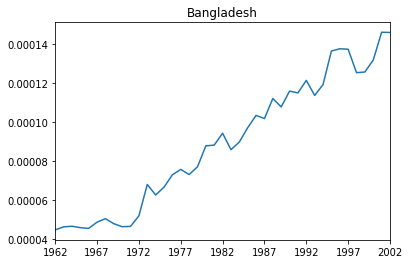

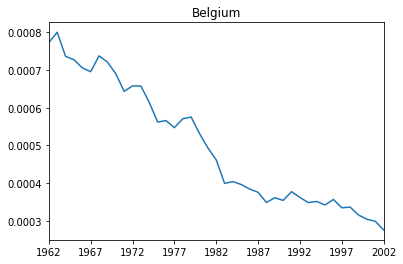

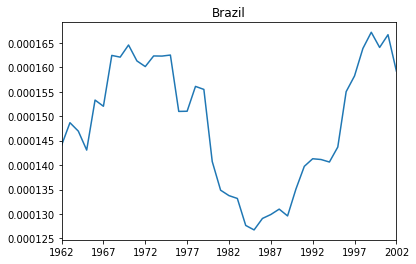

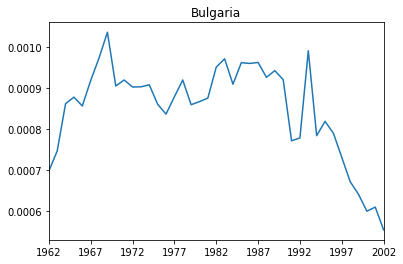

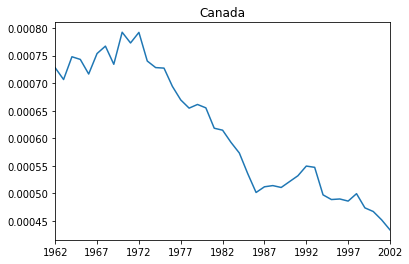

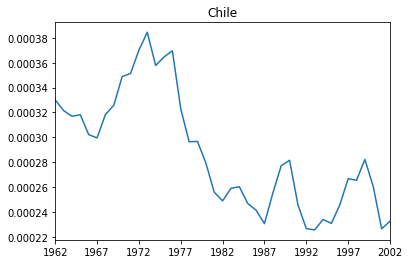

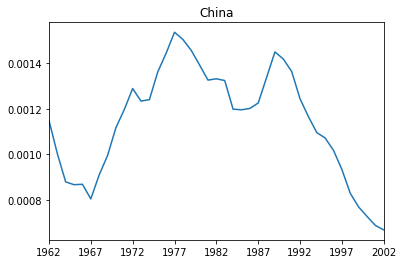

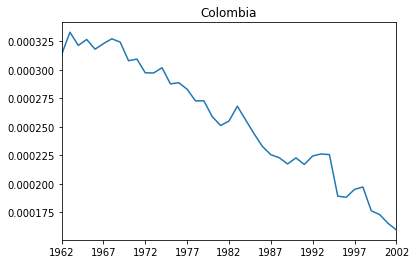

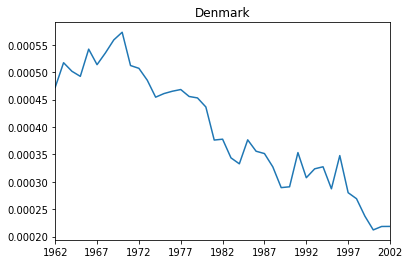

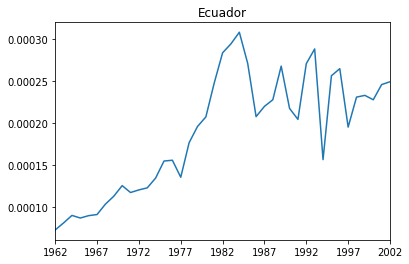

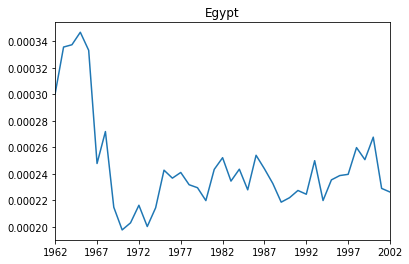

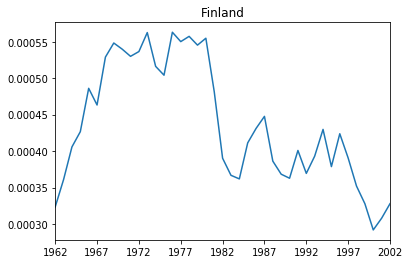

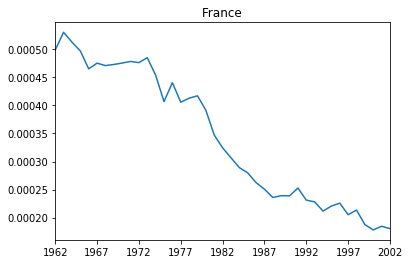

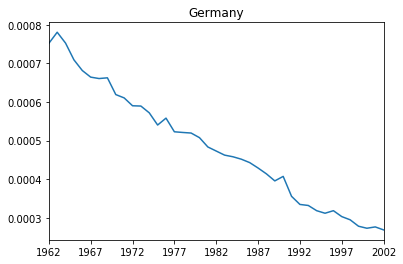

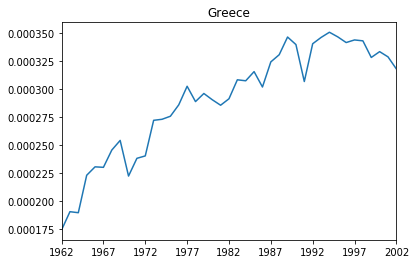

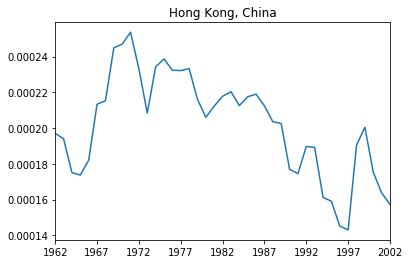

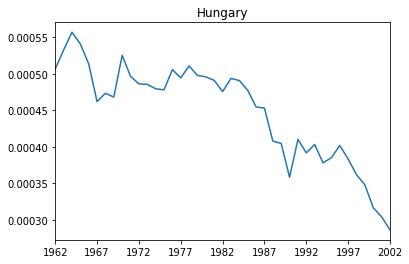

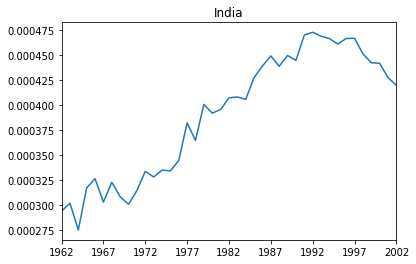

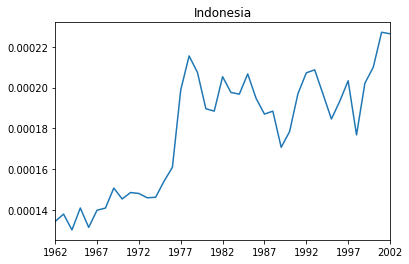

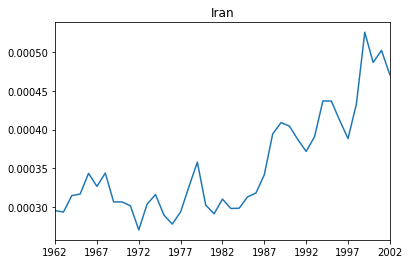

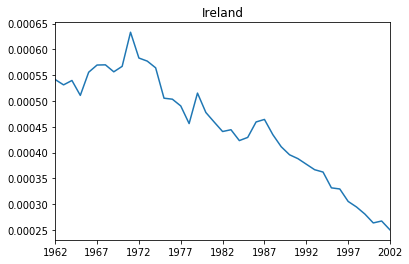

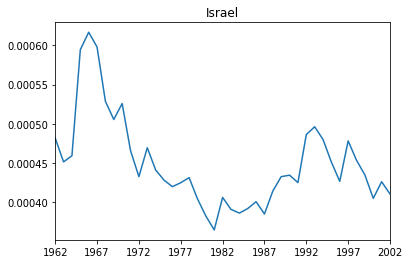

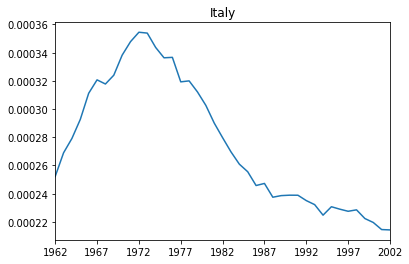

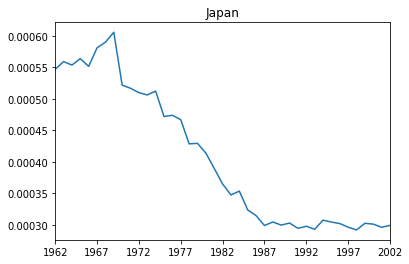

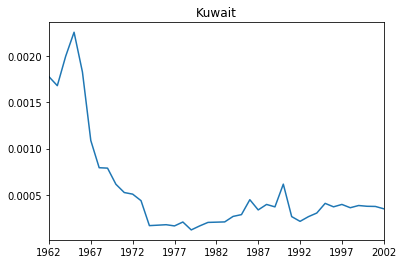

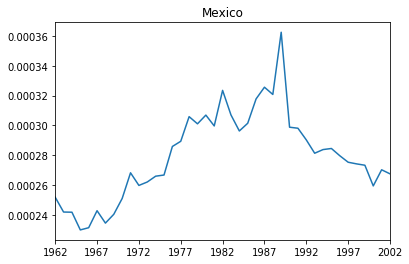

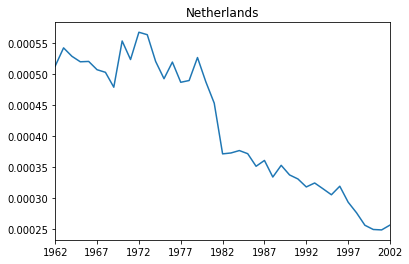

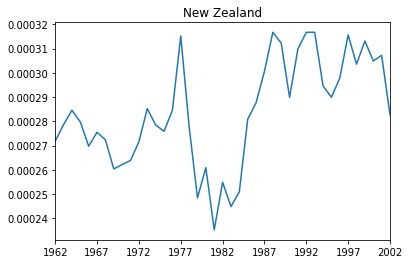

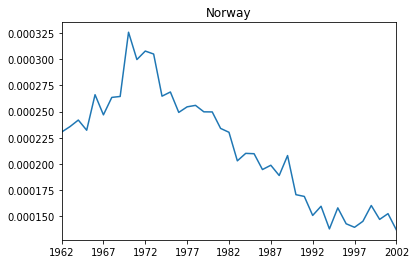

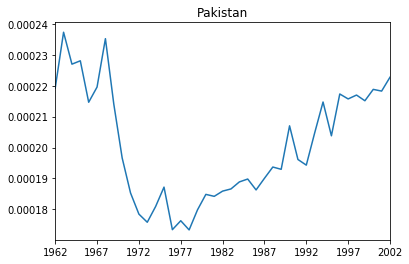

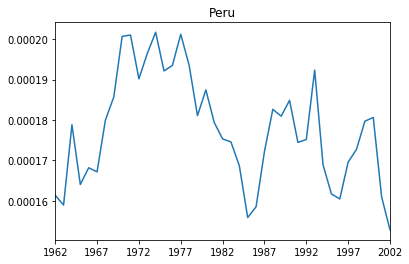

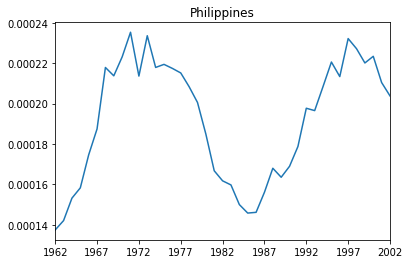

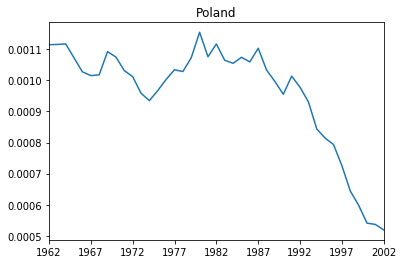

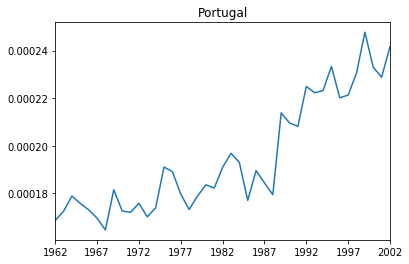

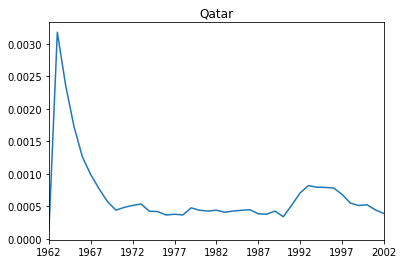

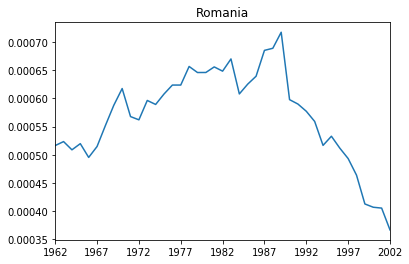

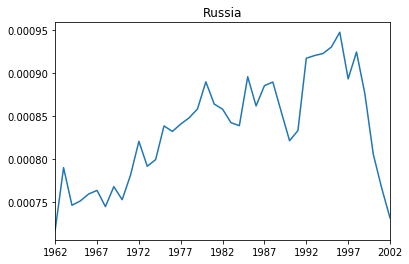

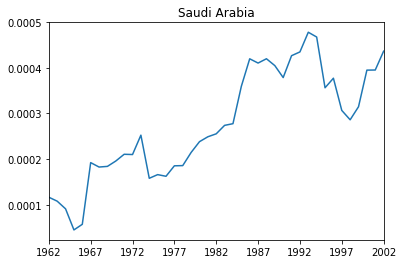

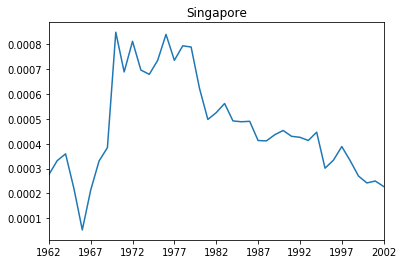

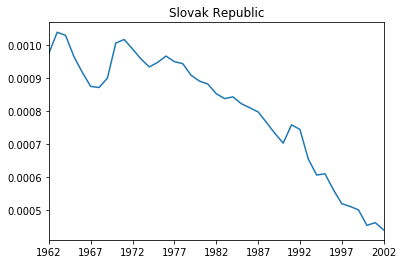

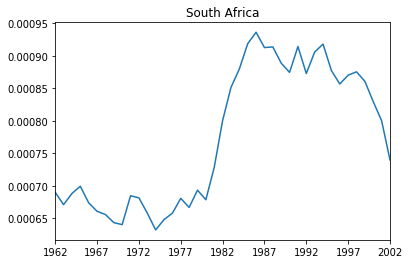

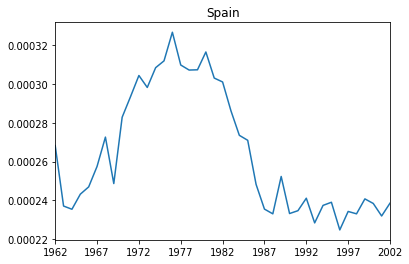

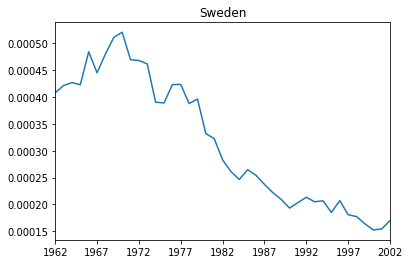

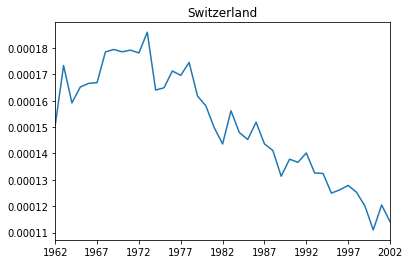

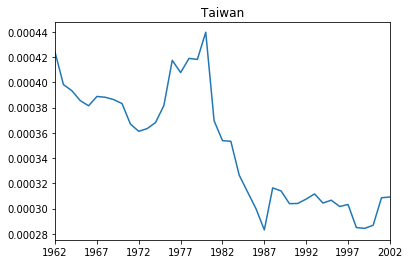

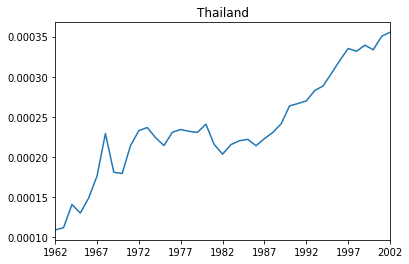

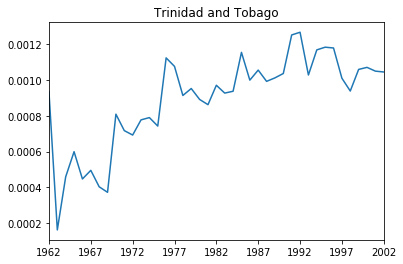

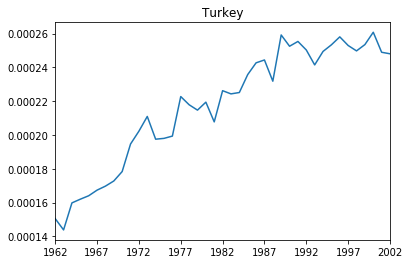

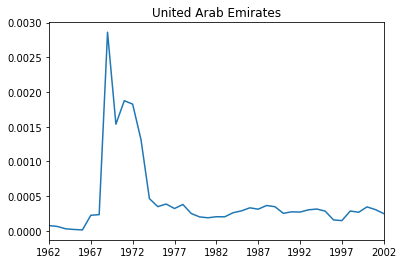

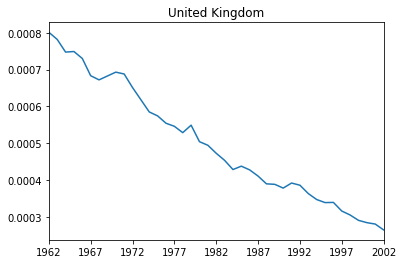

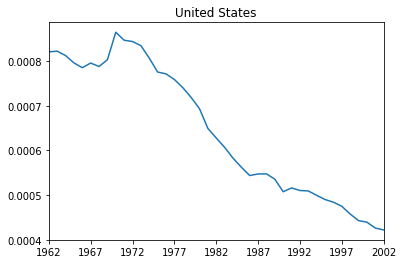

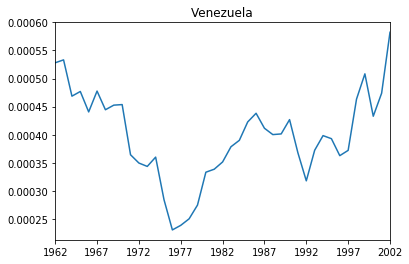

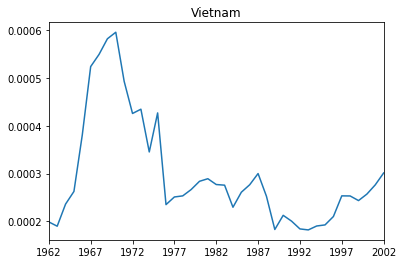

In [96]:
for country in df_ratios_train.columns:

    series = df_ratios_train[country]
    series.plot(title = country)
    plt.show()

Looks like more developed countries generally have a similar trend in the ratios. 

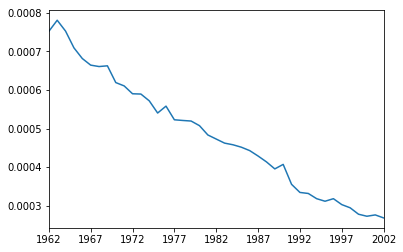

In [41]:
series = df_ratios_train['Germany']
# series = df_ratios['Germany']
series.plot()

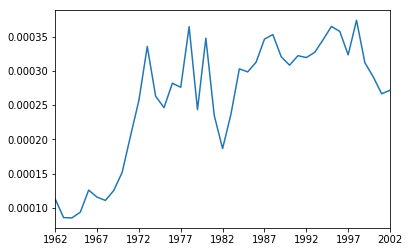

In [42]:
series = df_ratios_train['Algeria']
series.plot()

In [43]:
'''
running ARIMA on all the countries
''';

In [44]:
for country in df_ratios_train.columns:
    array = np.array(df_ratios_train[country])
    model = ARIMA(array, order=(0,1,1))
    model_fit = model.fit(disp=0)
    print('\n\n', country)
    print(model_fit.summary())



 Algeria
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 343.954
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -681.908
Time:                        14:14:51   BIC                           -676.841
Sample:                             1   HQIC                          -680.076
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.34e-06   4.79e-06      0.906      0.370   -5.05e-06    1.37e-05
ma.L1.D.y     -0.3293      0.154     -2.137      0.039      -0.631      -0.027
                                    Roots

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Chile
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 383.843
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -761.686
Time:                        14:14:51   BIC                           -756.619
Sample:                             1   HQIC                          -759.854
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.273e-06   3.87e-06     -0.588      0.560   -9.85e-06    5.31e-06
ma.L1.D.y      0.5041      0.191      2.644      0.012       0.130       0.878
                                    Roots  

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Greece
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 390.427
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -774.854
Time:                        14:14:52   BIC                           -769.787
Sample:                             1   HQIC                          -773.022
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.603e-06   1.69e-06      2.126      0.040    2.81e-07    6.92e-06
ma.L1.D.y     -0.2374      0.168     -1.410      0.167      -0.567       0.093
                                    Roots 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Iran
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 361.725
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -717.449
Time:                        14:14:52   BIC                           -712.383
Sample:                             1   HQIC                          -715.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.406e-06    4.4e-06      1.001      0.323   -4.22e-06     1.3e-05
ma.L1.D.y     -0.0289      0.237     -0.122      0.904      -0.494       0.436
                                    Roots   

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Norway
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 381.591
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -757.182
Time:                        14:14:52   BIC                           -752.115
Sample:                             1   HQIC                          -755.350
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.322e-06      2e-06     -1.161      0.253   -6.24e-06     1.6e-06
ma.L1.D.y     -0.2797      0.120     -2.324      0.026      -0.516      -0.044
                                    Roots 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Singapore
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 308.080
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -610.160
Time:                        14:14:53   BIC                           -605.094
Sample:                             1   HQIC                          -608.328
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.305e-06   1.53e-05     -0.085      0.933   -3.14e-05    2.88e-05
ma.L1.D.y     -0.1150      0.147     -0.783      0.438      -0.403       0.173
                                    Roo

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Sweden
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 365.848
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -725.697
Time:                        14:14:53   BIC                           -720.630
Sample:                             1   HQIC                          -723.865
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.092e-06   3.57e-06     -1.706      0.096   -1.31e-05    9.06e-07
ma.L1.D.y     -0.1287      0.145     -0.890      0.379      -0.412       0.155
                                    Roots 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 335.329
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -664.659
Time:                        14:14:53   BIC                           -659.592
Sample:                             1   HQIC                          -662.827
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.563e-06   8.96e-06      0.286      0.777    -1.5e-05    2.01e-05
ma.L1.D.y      0.0253      0.126      0.200      0.842      -0.222       0.273
                                    Roots           

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:

array = np.array(df_ratios_train['Germany'])
model = ARIMA(array, order=(0,1,1))
fit = model.fit(disp=0)

print(fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 386.761
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Apr 2019   AIC                           -767.521
Time:                        14:14:53   BIC                           -762.455
Sample:                             1   HQIC                          -765.689
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.234e-05   1.91e-06     -6.453      0.000   -1.61e-05   -8.59e-06
ma.L1.D.y     -0.2201      0.215     -1.023      0.313      -0.642       0.202
                                    Roots           

## Function for plotting data

In [107]:
def plots(data, lags=None):
    '''
    plotting the data with specified number of lags.
    plotting raw data, then ACF and PACF
    '''
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(12, 6))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

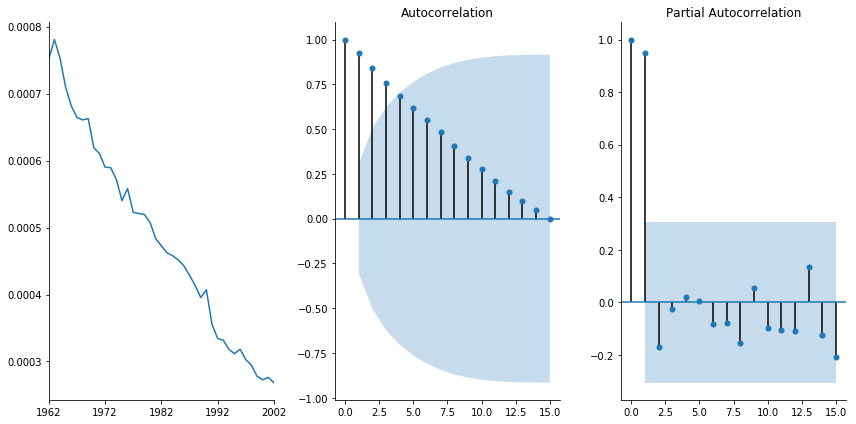

In [47]:
plots(df_ratios_train['Germany'], lags = 15)

In [48]:
df_ratios_train['Germany'].diff().std()

1.6045950015955636e-05

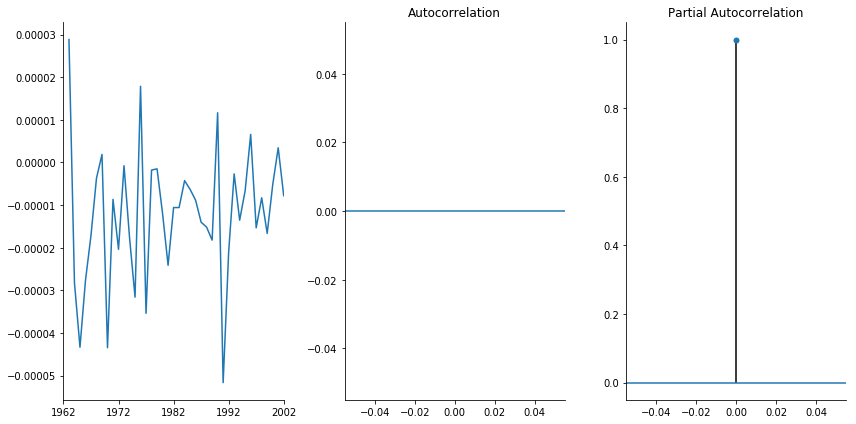

In [49]:
'''
now making it stationary with a diff function
'''

plots(df_ratios_train['Germany'].diff(), lags = 15)

In [50]:
fuller_test(df_ratios_train['Germany'])

ADF Statistic: -2.444876
p-value: 0.129469
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


## Grid lock search for best parameters

In [51]:
def find_best_params(array):
    '''
    attempting to find the best parametes using a simple grid lock search
    '''
    
    
    # creating the  parameters as tuples
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    results = {}
    for param in pdq:
        
        try:
            model = ARIMA(array ,order = param )
            fit = model.fit()
            results[str(param)] = fit.aic
            
        except:
            continue

    print(min(results, key=results.get))
    return results

In [52]:
array = np.array(df_ratios_train['Germany'])
find_best_params(array)

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

(0, 1, 1)


{'(0, 0, 0)': -602.078908555908,
 '(0, 0, 1)': -647.6747774780753,
 '(0, 1, 0)': -766.7019557177717,
 '(0, 1, 1)': -767.5212598695571,
 '(0, 1, 2)': -766.9903486342569,
 '(0, 2, 0)': -714.6990046983078,
 '(0, 2, 1)': -727.9906756919206,
 '(0, 2, 2)': -731.1606950166328,
 '(1, 0, 0)': -760.2872409530737,
 '(1, 0, 1)': -760.2885059030682,
 '(1, 1, 0)': -766.878600349235,
 '(1, 1, 1)': -766.6146393674794,
 '(1, 2, 0)': -724.4071811345615,
 '(1, 2, 1)': -739.661409953462,
 '(1, 2, 2)': -734.4223291454709,
 '(2, 0, 0)': -761.2550675717357,
 '(2, 1, 0)': -766.4316554455594,
 '(2, 1, 1)': -765.0862961261273,
 '(2, 1, 2)': -763.0467043015361,
 '(2, 2, 0)': -729.0869678067305,
 '(2, 2, 1)': -738.4610289031874}

In [53]:
# array = np.array(df_ratios_train['Germany'].diff())
# find_best_params(array)

In [54]:
df_co2_train = df_co2_transpose.loc['1962':'2007']

In [55]:
array = np.array(df_co2_train['Germany'])
find_best_params(array)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


(0, 1, 0)


{'(0, 0, 0)': 169.62235308270886,
 '(0, 0, 1)': 125.48029601365137,
 '(0, 0, 2)': 105.3934569770492,
 '(0, 1, 0)': 53.36660722440348,
 '(0, 1, 1)': 55.35931680856058,
 '(0, 1, 2)': 57.128304128151115,
 '(0, 2, 0)': 82.28704571280196,
 '(0, 2, 1)': 55.79165458034538,
 '(1, 0, 0)': 58.900756817412656,
 '(1, 0, 1)': 60.870411537059695,
 '(1, 0, 2)': 62.82554798006434,
 '(1, 1, 0)': 55.36032328863274,
 '(1, 2, 0)': 73.61075774288379,
 '(1, 2, 1)': 57.699023394601156,
 '(2, 0, 0)': 60.87219794890051,
 '(2, 0, 2)': 64.29050667641644,
 '(2, 1, 0)': 57.157277752294846,
 '(2, 1, 1)': 58.55253023109542,
 '(2, 2, 0)': 68.84916761723618,
 '(2, 2, 1)': 59.168831568176756}

## Test for stationality
In order to use an ARIMA model the time series has to be stationary. We can test that by using the fuller test

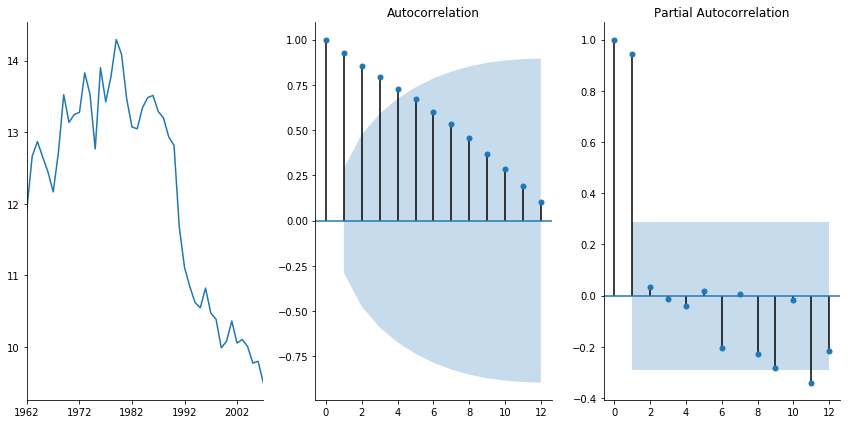

In [106]:
plots(df_co2_train['Germany'], lags = 12)

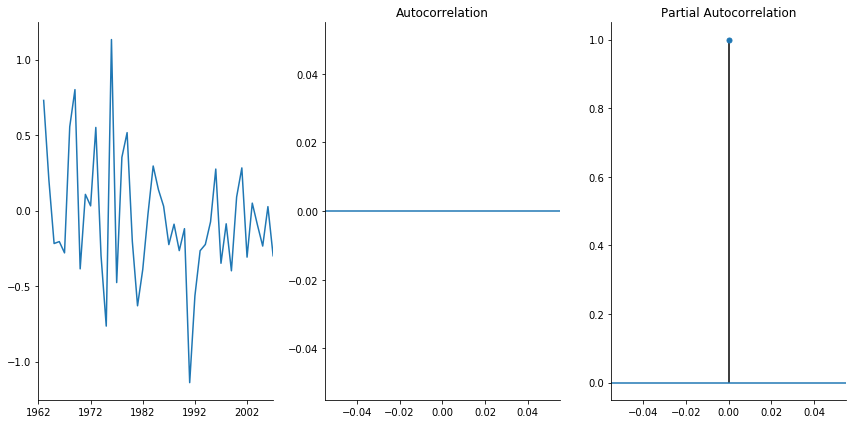

In [57]:
plots(df_co2_train['Germany'].diff(), lags = 12)

In [104]:
fuller_test(df_co2_train['Germany'])

ADF Statistic: -0.098328
p-value: 0.949605
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


In [105]:
fuller_test(df_co2_train['Germany'].diff().dropna())

ADF Statistic: -6.803544
p-value: 0.000000
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


In [59]:
'''
creating train beta df
'''



reg_years = list(map( lambda x : str(x), range(1962, 2003)))
reg_years;
df_betas = df_co2_train.copy()
df_betas['beta'] = np.nan
df_betas.head()
for year in reg_years:
    lr1 = LinearRegression()
    x = np.array(df_gdp_train.loc[year])
    y = np.array(df_co2_train.loc[year])
    lr1.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    df_betas.loc[year]['beta'] = (lr1.coef_[0][0])
df_betas = df_betas[['beta']]

In [60]:
''' 
creating validation beta df

'''




reg_years = list(map( lambda x : str(x), range(2003, 2008)))
reg_years;
df_betas_val = df_co2_transpose.copy()
df_betas_val['beta'] = np.nan
df_betas_val.head()
for year in reg_years:
    lr1 = LinearRegression()
    x = np.array(df_gdp_transpose.loc[year])
    y = np.array(df_co2_transpose.loc[year])
    lr1.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    df_betas_val.loc[year]['beta'] = (lr1.coef_[0][0])
df_betas_val = df_betas_val[['beta']]
df_betas_val = df_betas_val.loc['2003':'2007']

In [61]:
''' 
creating test beta df

'''




reg_years = list(map( lambda x : str(x), range(2007, 2013)))
reg_years;
df_betas_test = df_co2_transpose.copy()
df_betas_test['beta'] = np.nan
df_betas_test.head()
for year in reg_years:
    lr1 = LinearRegression()
    x = np.array(df_gdp_transpose.loc[year])
    y = np.array(df_co2_transpose.loc[year])
    lr1.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    df_betas_test.loc[year]['beta'] = (lr1.coef_[0][0])
df_betas_test = df_betas_test[['beta']]
df_betas_test = df_betas_test.loc['2008':'2012']

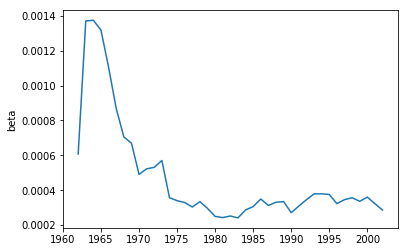

In [62]:
sns.lineplot(y = df_betas['beta'], x = df_betas.index.values.astype(int))

In [63]:
# fuller_test(df_betas_test['beta'])

In [64]:
'''
finding the best params for training data betas
'''

array = np.array(df_betas['beta'])
find_best_params(array)

(0, 0, 0)


/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

{'(0, 0, 0)': nan, '(0, 1, 0)': nan, '(0, 2, 0)': nan}

In [65]:
df_betas_val

country,beta
2003,0.000325
2004,0.000330
2005,0.000335
2006,0.000313
2007,0.000305


In [66]:
df_betas_test

country,beta
2008,0.000290
2009,0.000275
2010,0.000262
2011,0.000252
2012,0.000270


In [82]:
predictions = []
df_beta_hist = df_betas.copy().dropna()

val_years = list(map( lambda x : (x), range(2003, 2008)))
for year in val_years:
    model = ARIMA(df_beta_hist, order = (1, 0, 2))
    fit = model.fit()
#     pred = fit.predict(start = 2002, end= year)
    pred = fit.predict(start = pd.to_datetime(2002), end= pd.to_datetime(year))
    print(pred)
    predictions.append(pred)


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [97]:
df_beta_hist;


In [98]:
df_betas;